# Benford  for Python

### Current version: 0.2.0

# Installation

### Benford for python is a Package in PyPi, so you can install with *pip*:
##### `$ pip install benford_py`

### Or you can cd into the site-packages subfolder of your python distribution (or environment) and clone from there:
##### `$ git clone http://github.com/milcent/Benford_py.git`

# Demo

### This demo assumes you have (at least) some familiarity with Benford's Law.

### First let's import some libraries and the benford module.

In [27]:
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
import benford as bf

### Quick start

#### Getting some public data with pandas, the S&P500 EFT quotes, up until Dec 2016.
##### I have downloaded it and saved it in the data folder, so you should have it if you cloned the repo. Alternatively, you an downolad it [here](https://github.com/milcent/benford_py/blob/master/data/SPY.csv).

In [3]:
sp = pd.read_csv('data/SPY.csv', index_col='Date', parse_dates=True)

#### Creating simple and log return  columns

In [28]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Close/sp.Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Close/sp.Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-12-23,225.429993,225.720001,225.210007,225.710007,36251400,225.710007,0.001464,0.001463
2016-12-27,226.020004,226.729996,226.000000,226.270004,41054400,226.270004,0.002481,0.002478
2016-12-28,226.570007,226.589996,224.270004,224.399994,59776300,224.399994,-0.008265,-0.008299
2016-12-29,224.479996,224.889999,223.839996,224.350006,47719500,224.350006,-0.000223,-0.000223
2016-12-30,224.729996,224.830002,222.729996,223.529999,101301800,223.529999,-0.003655,-0.003662


### First Digits Test

### Let us see if the SPY log returns look like Benford.
#### The `first_digits` function's first argument is the data to be analysed, which may be a pandas Series or a numpy 1D array.
#### The `digs` argument tells the function which test to run: 1 for the _first_, 2 for the _first two_, and 3 for the _first three_ digits.The `decimals` parameter tells the function how many decimal places to consider when pre-processing the data. It defaults to 2, for dealing with currency, but since here we are dealing with tiny numbers, we will go with 8.


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 1 after preparation.


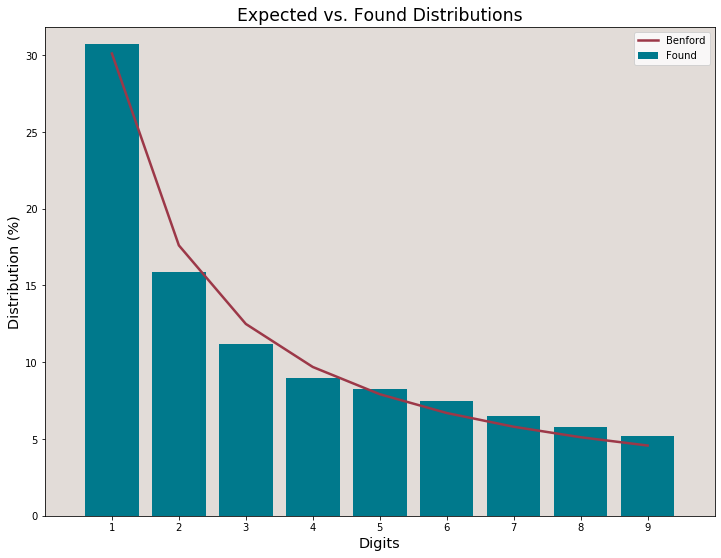

In [29]:
f1d = bf.first_digits(sp.l_r, digs=1, decimals=8) # digs=1 for the first digit (1-9)

#### The *first_digits* function draws the plot (default) with blue bars fot the digits found frequencies and a red line corresponding to the expected Benford proportions. 
#### It also returns a pandas DataFrame object with Counts, Found proportions and Expected values for each digit in the data studied.
#### By default, (`verbose`=True) it also gives informaiton on the sample size and on the number of records eventually discarded during pre-processing (more on this later) .

In [6]:
f1d

,Counts,Found,Expected
First_1_Dig,,,
1,1835,0.307473,0.301030
2,949,0.159015,0.176091
3,668,0.111930,0.124939
4,534,0.089477,0.096910
5,494,0.082775,0.079181
6,447,0.074899,0.066947
7,386,0.064678,0.057992
8,345,0.057808,0.051153
9,310,0.051944,0.045757


### First Two Digists


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.


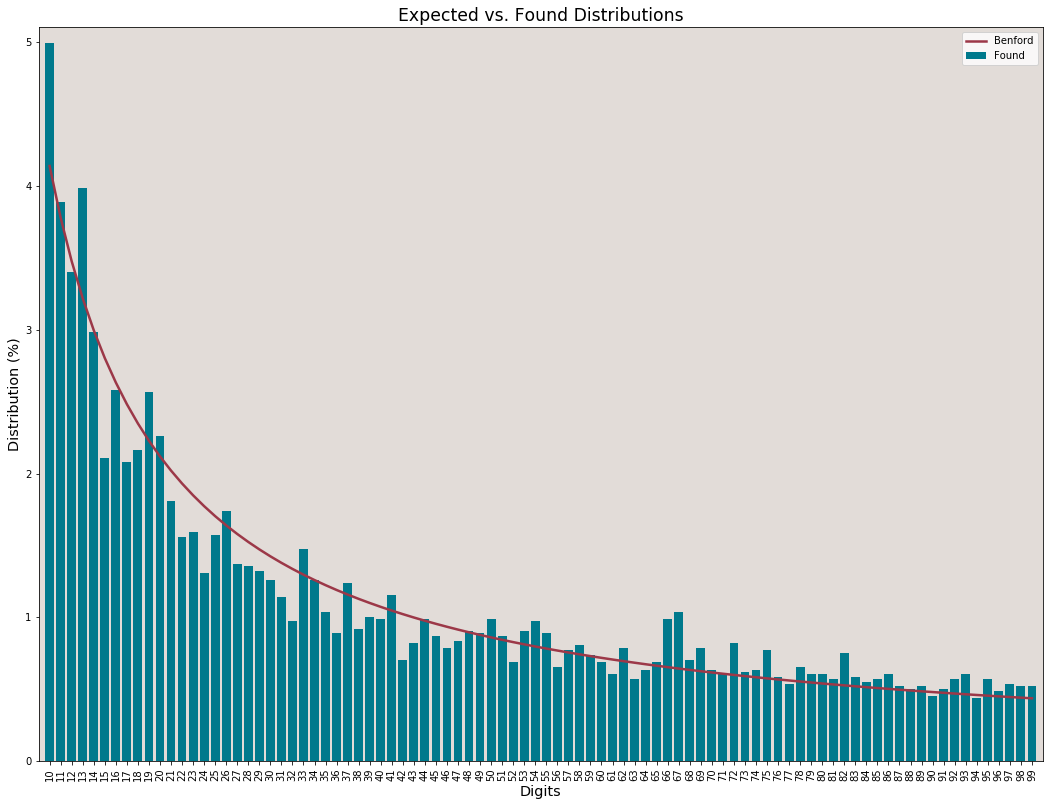

In [7]:
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8) # Note the parameter digs=2!

In [8]:
f2d.head()

,Counts,Found,Expected
First_2_Dig,,,
10,298,0.049933,0.041393
11,232,0.038874,0.037789
12,203,0.034015,0.034762
13,238,0.039879,0.032185
14,178,0.029826,0.029963


In [9]:
f2d.tail()

,Counts,Found,Expected
First_2_Dig,,,
95,34,0.005697,0.004548
96,29,0.004859,0.004501
97,32,0.005362,0.004454
98,31,0.005194,0.004409
99,31,0.005194,0.004365


## Assessing conformity

#### There are some tests to evaluate if the data studied is a good fit to Benford's Law. I would first divide them for didatic purposes into two main categories:
- #### Tests which result in a single (scalar) statistic about the whole sample. Some examples are:
    - #### the **Chi-Square** test;
    - #### the **Kolmogorov-Smirnov** test;
    - #### the Mean Absolute Deviation (**MAD**) test; and
    - #### the Mean Squared Errors (**MSE**) test.
- #### Tests that render one statistic for each of the studied leading digits' proportions in relation to the expexted Benford's ones. That's the case of the **Z statistic** for the proportions. We will start with this one.

#### The Z scores test, as well as some others, needs a confidence level so as to set a threshold for the devitions to be deemed relevant (above it) or not (below it). In the digits functions, you can turn it on by setting the parameter `confidence`, which will tell the function which confidence level to consider after calculating the Z score for each proportion.


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_2_Dig                              
67           0.006434  0.010389  3.740056
13           0.032185  0.039879  3.331418
10           0.041393  0.049933  3.279619
66           0.006531  0.009886  3.137524
82           0.005264  0.007540  2.340301
72           0.005990  0.008210  2.138736


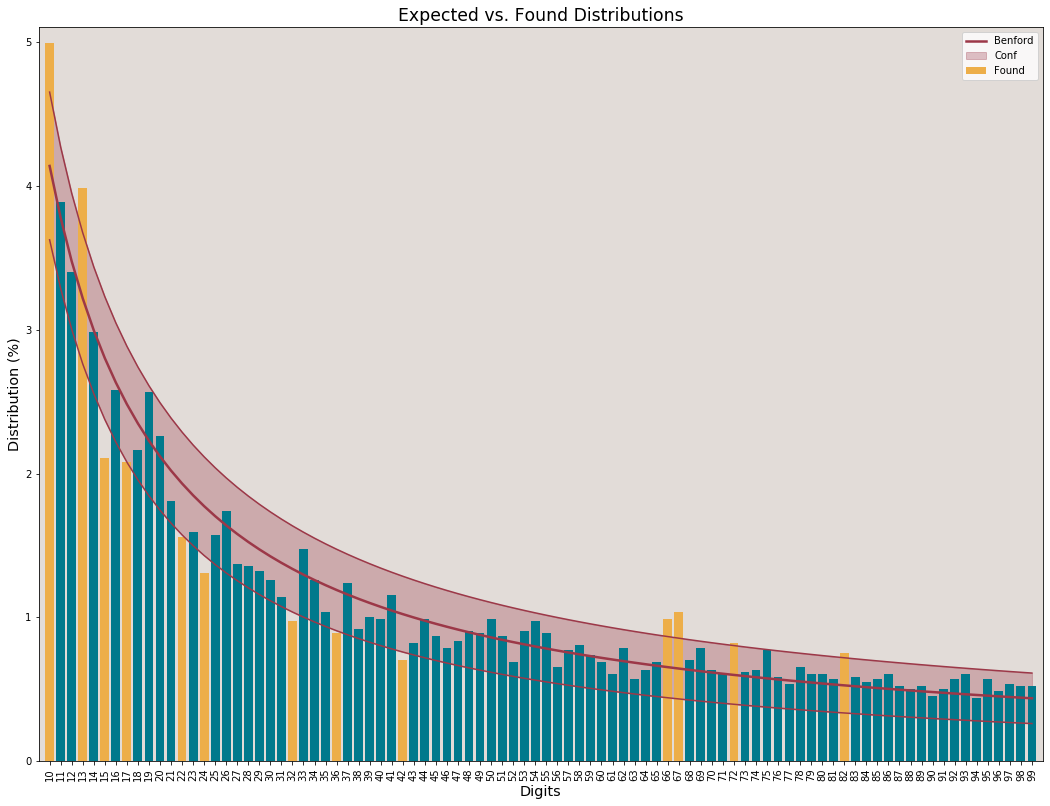

In [31]:
# For a significance of 5% (p <= 0.05), a confidence of 95%
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8, confidence=95)

#### Some things happened:
- #### It printed a DataFrame with the **significant positive deviations**, in descending order of the Z scores. So, for a confidence level of 95%, the data to be considered for further investigation would be the records with First Two Digits **67**, **13**, **10**, **66**, **82** and **72**, whose propostions displayed a Z score higher than 1.96 (95%) **and** were positive, ie, were higher than the expected proportions. The function can also return **all** the relevant deviations or just the **negative** ones, by setting the `high-Z` parameter to 'all' or 'neg', respectively (see below).
- #### In the plot, it added upper and lower boundaries to the Benford Expected line based on the level of confidence. Accordingly, it changed the colors of the bars whose proportions fell lower or higher than the drawn boundaries, for better vizualization.

#### The *confidence* parameter takes the following (discrete) values other than *None*: 80, 85, 90, 95, 99, 99.9, 99.99, 99.999, 99.9999 and 99.99999.

### Other tests and their Z scores 

#### We can do all this with the *First Three Digits*, *Second Digit* and the *Last Two Digits* tests too.


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 100 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_3_Dig                              
952          0.000456  0.001676  4.110387
962          0.000451  0.001508  3.539604
997          0.000435  0.001340  3.041483
823          0.000527  0.001508  3.017908
695          0.000624  0.001676  2.991625
945          0.000459  0.001340  2.874850
139          0.003113  0.005194  2.769750
751          0.000578  0.001508  2.720614
874          0.000497  0.001340  2.635545
862          0.000504  0.001340  2.593616


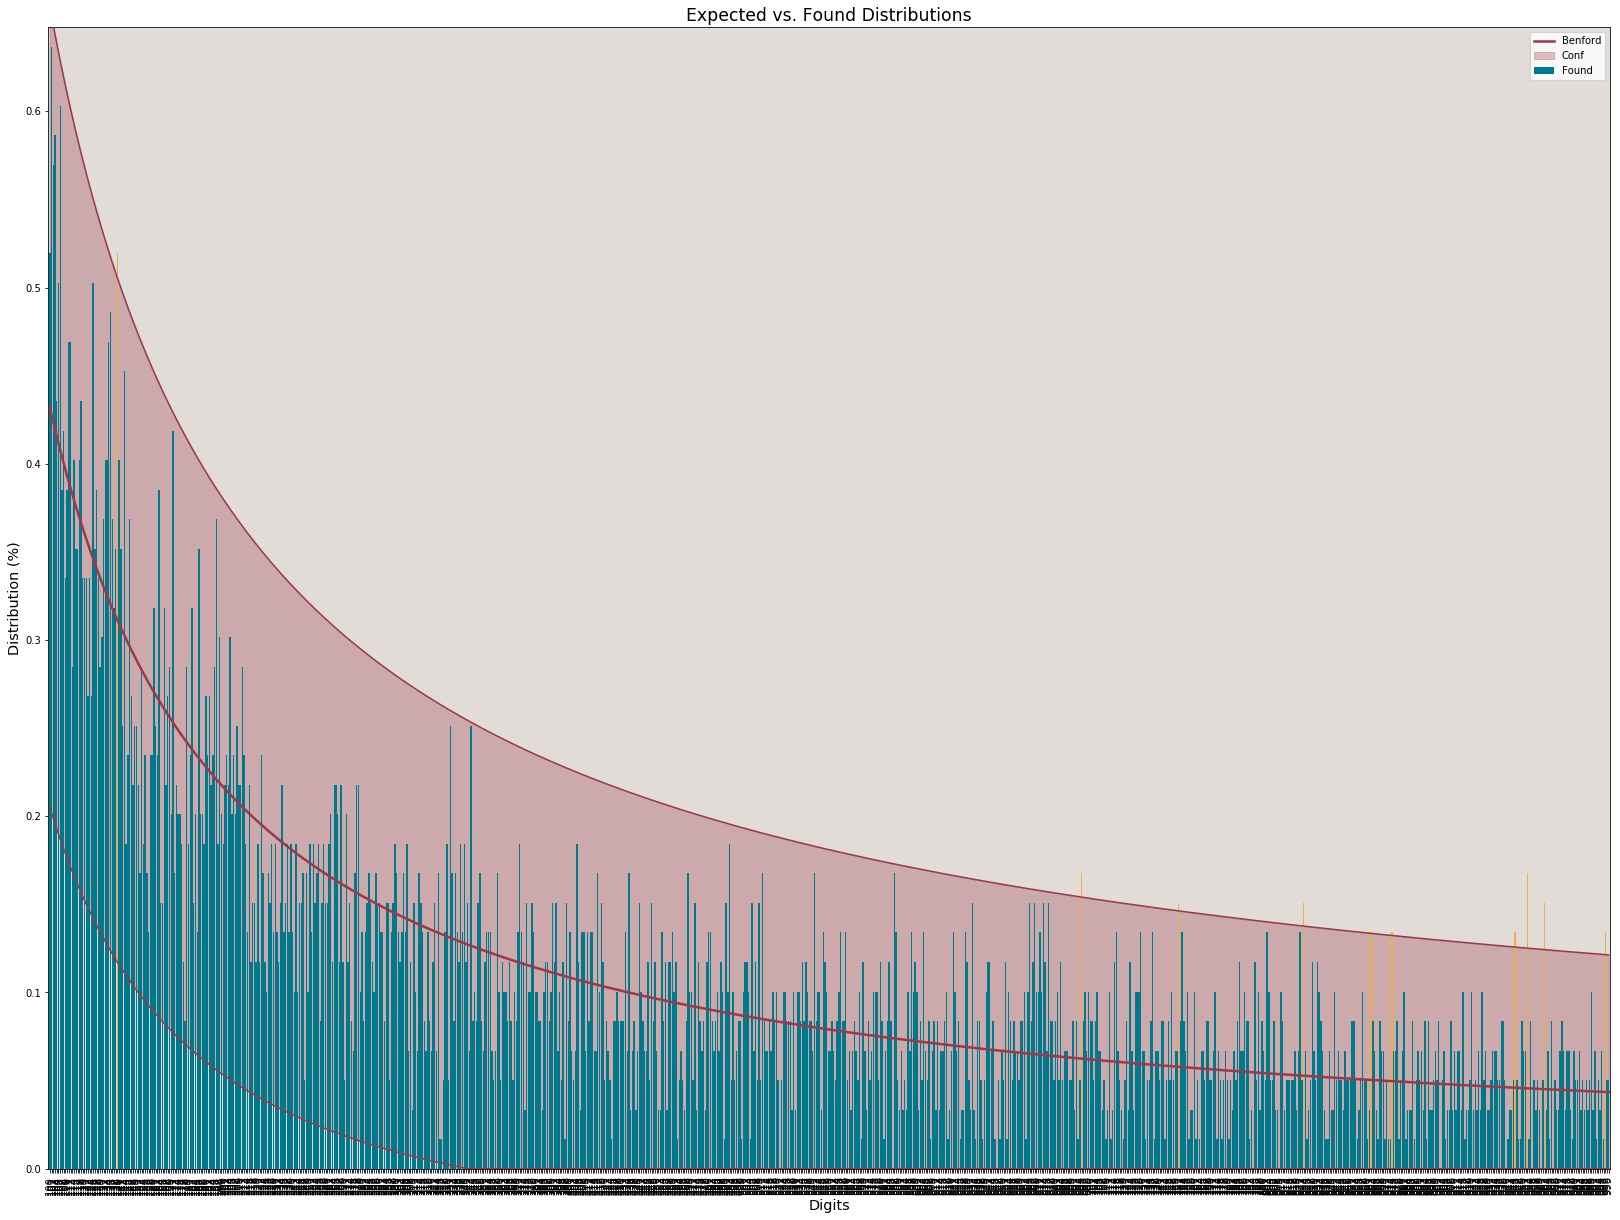

In [11]:
# First Three Digits Test, now with 99% confidence level
# digs=3 for the first three digits
f3d = bf.first_digits(sp.l_r, digs=3, decimals=8, confidence=99)

#### The First Three Digits plot is better seen and zoomed in and out without the inline plotting. Try `%matplotlib` jupyter magic to have it rendered in a separate window.

#### There are also the Second Digit and Last Two Digits tests, as shown bellow. These are implemented with separate (and accordingly named) functions with the same parametres but `digs`.


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant deviations are:

         Expected     Found   Z_score
Sec_Dig                              
0        0.119679  0.128686  2.123777
3        0.104330  0.111595  1.814980
2        0.108821  0.102547  1.535754
5        0.096677  0.090818  1.509872


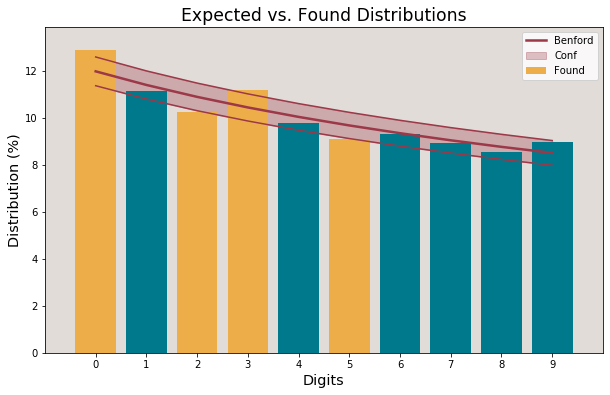

In [36]:
# Second Digit Test with confidence 85% and printing 'all' relevant deviations
sd = bf.second_digit(sp.l_r, decimals=8, confidence=85, high_Z='all')


Initialized sequence with 5968 registries.

Test performed on 5968 registries.

Discarded 0 records < 1000 after preparation

The entries with the significant negative deviations are:

            Expected     Found   Z_score
Last_2_Dig                              
25          0.010101  0.006032  3.078727
83          0.010101  0.007205  2.172566
12          0.010101  0.007373  2.043114
31          0.010101  0.007540  1.913662
55          0.010101  0.007708  1.784211
50          0.010101  0.007875  1.654759


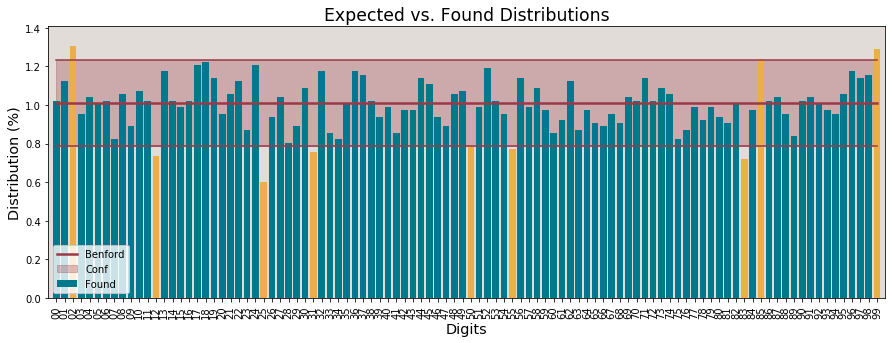

In [37]:
# Last Two Digits Test with confidence 90% and printing only the negative deviations
l2d = bf.last_two_digits(sp.l_r, decimals=8, confidence=90, high_Z='neg')

### Remembering the Important Parameters, and explaining some more
- #### `digs`: only used in the First Digits function, to tell it which test to run: 1- First Digits; 2- Fist Two Digits; and 3- First Three Digits.
- #### `decimals`: informs the number of decimal places to consider. Defaluts to 2, for currencies, but I set it to 8 here, since we are dealing with log returns (long floats). If the numbers are too small and you don't set it properly, you may have a division-by-zero error. If the sequence is of integers, set it to 0. You may also set it to *'infer'* if you don't know exactly or if the data has registries with different number of decimal places, and it will treat every registry separately (though with worse performance).
- #### `sign`: tells which portion of the data to consider. *'pos'*: only the positive entries; *'neg'*: only the negative ones; *'all'*: all entries but zeros. Defaults to *'all'*.
- #### `verbose`: gives information about the test during its run, like the number of registries analysed, the number of registries discarded according to each test (ie, < 10 for the First Digits), and shows the top Z scores of the resulting DataFrame if *confidence* is not None. Defaults to *True*.
- #### `high_Z`: chooses which Z scores to be used when displaying results, according to the set confidence level. Defaluts to *'pos'*, which will return only values higher than the expexted frequencies; *'neg'* will return only values lower than the expexted frequencies; *'all'* will return both extremes (positive and negative); and an integer will return the first n entries, positive and negative, regardless of whether Z is higher than the confidence or not.
- #### `limit_N`: sets a limit to the sample size for the calculation of the Z scores. This may be found useful if the sample is too big, due to the Z test power problem (More on this ahead). Defaults to None.
- #### `show_plot`: draws the test plot. Defaults to True. If *`confidence`* is not None, the plot will highlight the bars outside the lower and upper boundaries, regardless of the *`high_Z`* value.
- #### `MAD` and `MSE`: calculate, respectively, the Mean Absolute Deviation and the Mean Squared Error of the sample, for each test. Defaults to False. Both can be used inside the tests' functions or also separately, in their own functions, `mad()` and `mse()`.

### MAD

#### The Mean Absolute Deviation, or MAD, is, as the name states, the average of all absolute deviations (or errors, or residues) between the found proportions and the Benford's expected ones. 
#### <a href=www.sciencedirect.com/science/article/pii/S0748575100000087>Drake and Nigrini (2000)</a> developed this model, later revised by <a href=www.wiley.com/WileyCDA/WileyTitle/productCd-0470890460.html>Nigrini (2001)</a>, using empirical data to set limits of conformity for the First, First Two, First Three and Second Digits tests.
#### The MAD averages the proportions, so it is not directly influenced by the sample size. The lower the MAD, the better the confotmity.

In [40]:
mad1 = bf.mad(sp.l_r, test=1, decimals=8) # test=1 : MAD for the First Digits
mad1

0.008337279258069716

### Note that you must choose the *test* parameter, since there is one MAD for each test.
- #### First Digit: `1` or *'F1D'*;
- #### First Two Digits: `2` or *'F2D'*;
- #### First Three Digits: `3` or *'F3D'*;
- #### Second Digit: `22` or *'SD'*;
- #### Last Two Digits: `-2` or *'L2D'*;

In [16]:
mad2 = bf.mad(sp.l_r, test=2, decimals=8) # test=2 : MAD for the First Two Digits
mad2

0.001432048977662544

In [17]:
mad3 = bf.mad(sp.l_r, test=3, decimals=8) # test=3 : MAD for the First Three Digits
mad3

0.0003407180755952727

In [18]:
mad_sd = bf.mad(sp.l_r, test=22, decimals=8) # test=22 : MAD for the Second Digits
mad_sd

0.004150506450239337

In [19]:
mad_l2d = bf.mad(sp.l_r, test=-2, decimals=8) # test=-2 : MAD for the Last Two Digits
mad_l2d

0.0009972039429143992

#### Or you can set the *MAD* parameter to *True* when running the tests functions, and it will also give the corresponding conformity limits (as long as `verbose` is also True).

In [20]:
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8, MAD=True, show_plot=False)


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The Mean Absolute Deviation is 0.001432048977662544
For the First Two Digits:
            - 0.0000 to 0.0012: Close Conformity
            - 0.0012 to 0.0018: Acceptable Conformity
            - 0.0018 to 0.0022: Marginally Acceptable Conformity
            - Above 0.0022: Nonconformity


In [21]:
sd = bf.second_digit(sp.l_r, decimals=8, MAD=True, show_plot=False)


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The Mean Absolute Deviation is 0.004150506450239337
For the Second Digits:
            - 0.0000 to 0.008: Close Conformity
            - 0.008 to 0.01: Acceptable Conformity
            - 0.01 to 0.012: Marginally Acceptable Conformity
            - Above 0.012: Nonconformity


### Mantissas

#### The mantissa is the decimal part of a logarithm. In a Benford data set, the mantissas of the registries' logs are uniformly distributed, such that, when ordered, they should form a straight line in the interval \[0,1), with slope 1/N, N being the sample size.
#### The closest the mantissas **mean**, **variance**, **skewness** and **kurtosis** are to the reference values, the more compliant with Benford's the sample is.
#### This can also be assessed visually:
- #### with the ordered mantissas plot, as closest the red dotted line is to the blue, reference one; and
- #### with the Arc Test plot, in whch a nicely compliant sample would have its mantissas, plotted by sine versus cosine, evenly distributed along a circle, with a Gravity Center as close to the origin as possible.


 #################  Mantissas Test  #################

The Mantissas MEAN is      0.492058.	Ref: 0.5
The Mantissas VARIANCE is  0.089793.	Ref: 0.08333
The Mantissas SKEWNESS is  0.051333.	Ref: 0.0
The Mantissas KURTOSIS is  -1.280712.	Ref: -1.2



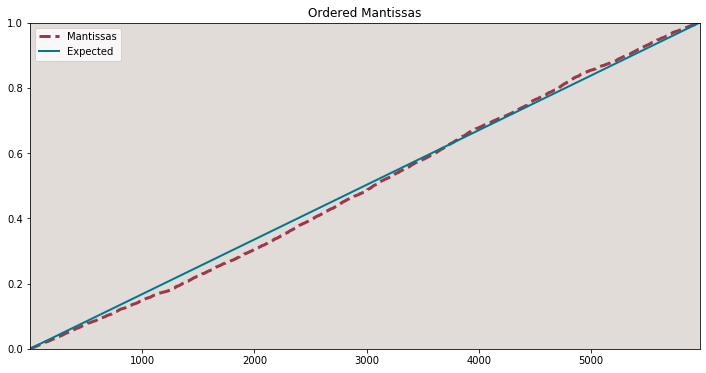

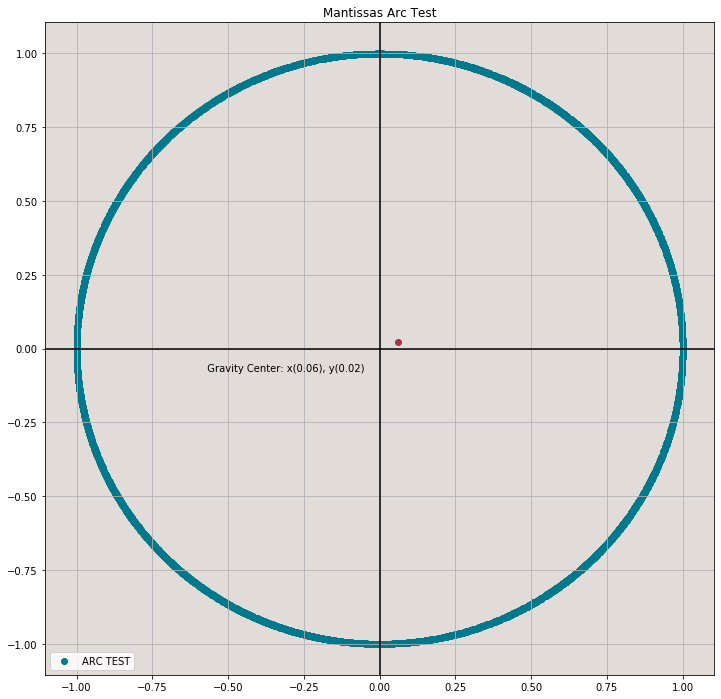

In [22]:
mant = bf.mantissas(sp.l_r, report=True, show_plot=True)

#### Checking if they are uniformly distributed, this time using just the pandas histogram plot. Maybe we will include this in later versions 

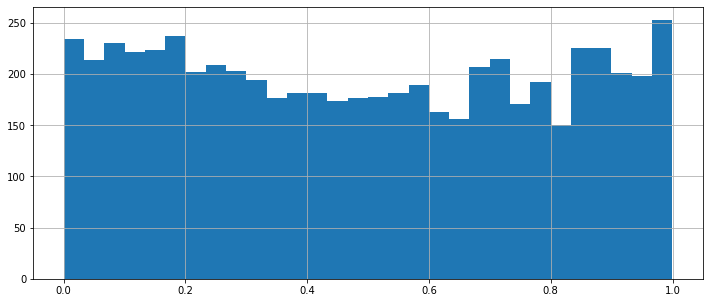

In [43]:
mant.data.Mantissa.hist(bins=30, figsize=(12,5));

#### To get a feeling of a less compliant sample, let us try the SPY closing prices instead of its returns.


 #################  Mantissas Test  #################

The Mantissas MEAN is      0.341217.	Ref: 0.5
The Mantissas VARIANCE is  0.106994.	Ref: 0.08333
The Mantissas SKEWNESS is  0.873759.	Ref: 0.0
The Mantissas KURTOSIS is  -0.846793.	Ref: -1.2



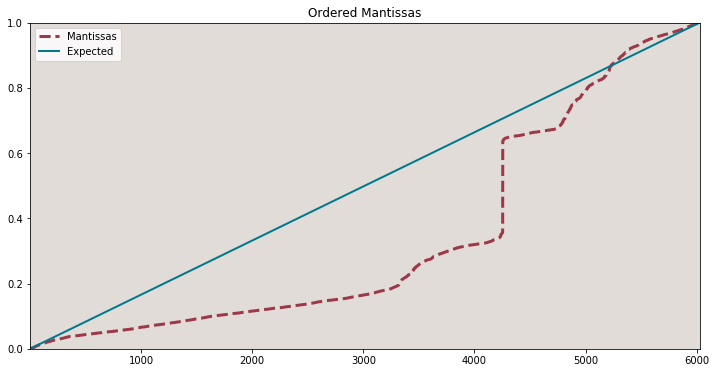

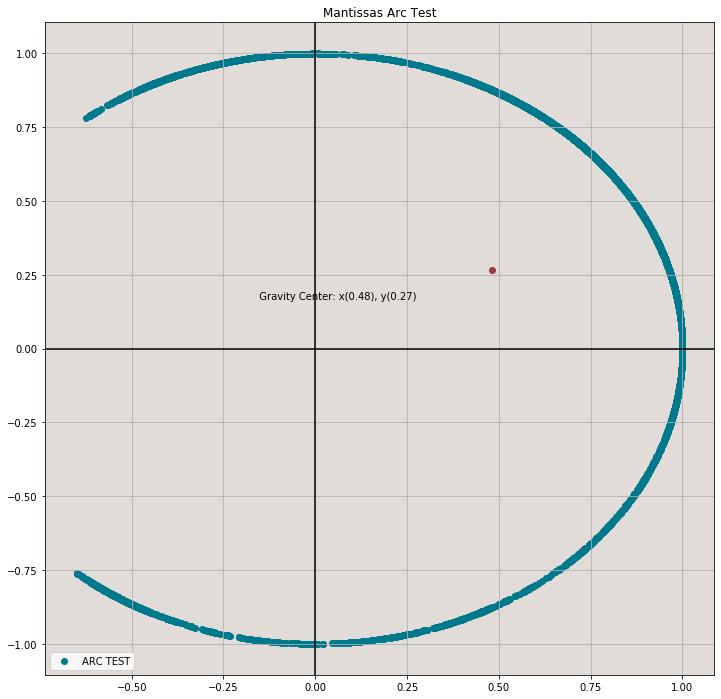

In [41]:
mant_close = bf.mantissas(sp.Close, report=True, show_plot=True)

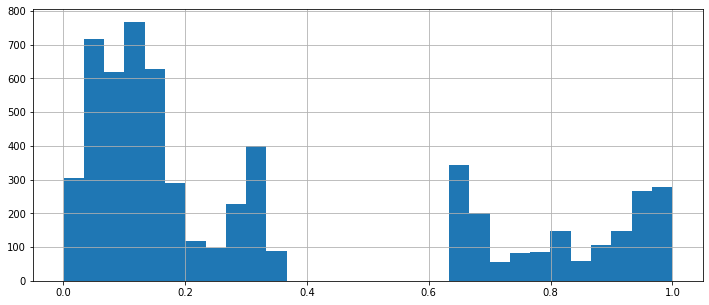

In [42]:
mant_close.data.Mantissa.hist(bins=30, figsize=(12,5));

## Benford Class

#### The Benford Class came form the need of having an object instance that would comprise all we needed, from the original `data`, to the pre-processed `base`, to all the possible `tests`, along with their respective statistics, independent, updatable confidence levels, and critical values. All this is accessible via the Benford instance atributes or methods.   

In [24]:
benf = bf.Benford((sp, 'l_r'), decimals=8)


 ########## Benford Object Instantiated ########### 

Initial sample size: 6026.

Test performed on 5968 registries.

Number of discarded entries for each test:
{'F1D': 0, 'F2D': 0, 'F3D': 0, 'SD': 0, 'L2D': 0}


##############
  First Digit Test  ############### 

Mean Absolute Deviation: 0.008337
0.006000 < MAD <= 0.012000: Acceptable conformity.

For confidence level 95%: 

	Kolmogorov Smirnoff: 0.031075 
	Critical value: 0.017605 -- FAIL

	Chi square: 43.563426 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
6            0.066947  0.074899  2.432260
8            0.051153  0.057808  2.304522
9            0.045757  0.051944  2.256091
7            0.057992  0.064678  2.182305


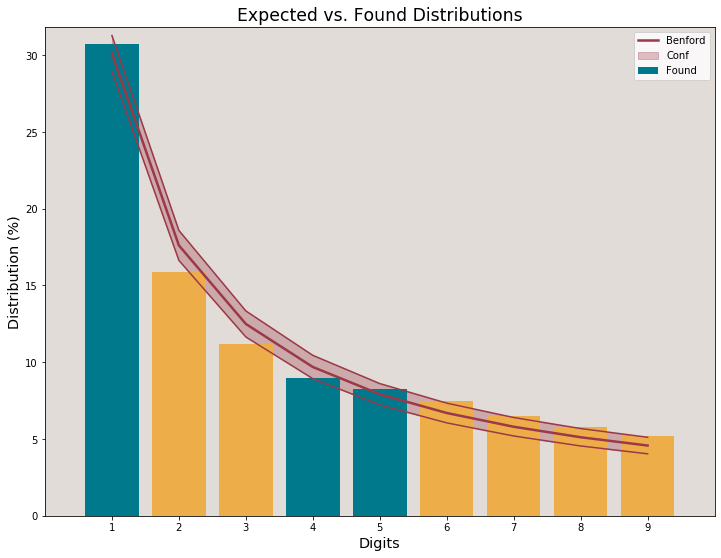

In [52]:
benf.F1D.report()

### That's it for now.
### If you have a data set that you think would be nice to study with Benford tests, share it and we can post a notebook with all tests and comments.
### Thanks
### Milcent